# Check-in: Reporting
### Terra

***note to self: *Things I want to figure out how to do: text customization, gifs in jupyter, in-page links* ***

## Description

This dataset contains a list of video game sales from 1983 to 2019. The file was obtained from Kaggle.com.

##### Fields of focus as seen in the data file
- name: the names of each game.
- platform: the platforms the games were released on.
- year: the years the games were released.
- genre: the genres of the games.
- publisher: the publishers of the games.
- na_sales: sales within North America (in millions).
- eu_sales: sales within Europe (in millions).
- jp_sales: sales within Japan (in millions).
- other_sales: sales in the rest of the world (in millions).
- global_sales: total of worldwide sales.

## Objective

***note to self: *[ Insert Leading Question Here ]* ***

In this project I will focus on conducting an exploratory analysis. The objective is to understand how the data is distributed and to generate information on how game buying decisions were made. This goal of this analysis is to explore the data intuitively and informatively. 

## Outline

#### 1. Loading the Data
- Libraries
- Loading in the File
- Summary of the Data

#### 2. Descriptive Statistics
- Frequency Distributions
- Trend Measurements
- Median Division
- Dispersion and Deviation

#### 3. Exploratory Analysis
- Best-selling games
- Sales per Platform
- Sales per Genre
- Sales per Publisher
- Sales per year


## 1. Loading the Data

### A. Libraries

The libraries I will be using are ... 

***note to self: *[ Insert definition of each library ] * delete unused libraries* ***

In [1]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats
# import seaborn
# import warnings
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### B. Loading in the File

In [2]:
vgSales = pd.read_csv('/Users/terra/Downloads/SpringSemester/EMAT/Final/archive/videogameglobalsales.csv')
vgSales.keys()

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

### C. Summary of the Data

***note to self: *remove nan values* ***

Running the data and looking at each element is important to understanding how the data is structured. This will help you identify what elements could potentially be outliers, find if there is repeating data, and figure out how the information can be manipulated. With csv files the data structure is very similar across the board, but, still, we can load up a couple of the index objects and run a table to make sure everything looks as it should.

In [3]:
vgSales['platform']

0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: platform, Length: 16598, dtype: object

In [4]:
vgSales['global_sales']

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: global_sales, Length: 16598, dtype: float64

In [5]:
vgSales.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## 2. Descriptive Statistics

Now that we have imported the data and have a general understanding of how the data is structured, we begin to observe the general behaviour of the data. This allows us to better facilitate problem solving. To do-so we can go more in depth by looking at patterns, trends, and differences within the data.

### A. Frequency Distributions

First, we can summarize the categorial variables by seperating each varibale based on the number of times they occur.

#### Years

In [6]:
# freqYear = vgSales[['year']].value_counts('year', ascending = False)
print(vgSales[['year']].value_counts('year', ascending = False))

# Can I get this in the form of a table?

year
2009.0    1432
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
dtype: int64


Text(0, 0.5, 'Number of Games Sold')

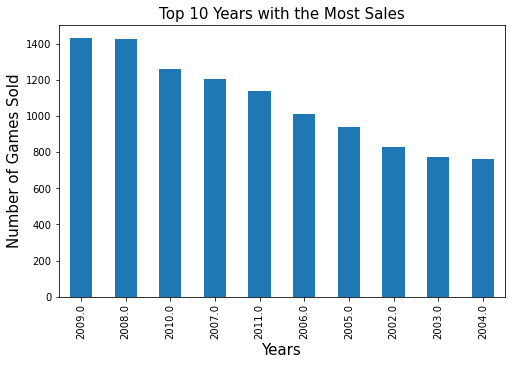

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
vgSales['year'].value_counts(sort=True).head(10).plot(kind='bar',ax=ax,rot =90)
plt.title('Top 10 Years with the Most Sales',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Games Sold',fontsize=15)

#### Platforms

In [39]:
print(vgSales[['platform']].value_counts('platform', ascending = False))

platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
dtype: int64


Text(0, 0.5, 'Number of Games Sold')

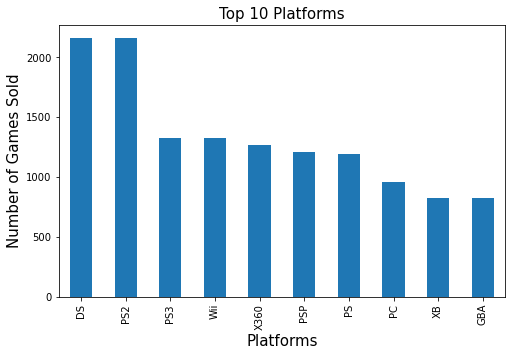

In [9]:
fig,ax = plt.subplots(figsize=(8,5))
vgSales['platform'].value_counts(sort=True).head(10).plot(kind='bar',ax=ax,rot =90)
plt.title('Top 10 Platforms',fontsize=15)
plt.xlabel('Platforms',fontsize=15)
plt.ylabel('Number of Games Sold',fontsize=15)

#### Names

The purpose of frequency data in some cases could also be for testing purposes. In this case, I assumed that each game would be listed one time, but it can be seen that several games appear in the data multiple times. This information is important to know because when we look at overall game sales, having the sales of the same game being seperated could scew the data and lead to a false report. So, it will be important to combine duplicates when entering the exploratory analysis phase.

In [10]:
vgSales['name'].value_counts(sort=True).head(10)

Need for Speed: Most Wanted                12
Madden NFL 07                               9
FIFA 14                                     9
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
Madden NFL 08                               8
Cars                                        8
LEGO Star Wars II: The Original Trilogy     8
Monopoly                                    8
Terraria                                    8
Name: name, dtype: int64

In [20]:
#Use a differrent graph that can display all name repetition data

# fig,ax = plt.subplots(figsize=(8,5))
# vgSales['name'].value_counts(sort=True).head(20).plot(kind='bar',ax=ax,rot =90)
# plt.title('Top 10 Platforms',fontsize=15)
# plt.xlabel('Platforms',fontsize=15)
# plt.ylabel('Amount of Times Listed',fontsize=15)

In [22]:
# Can I get the most frequent 5 years and platforms 
# as well as the least frequent 5 years and platforms in the form of percentages?

#### Sales

Because I ran code to look at frequency data for na_sales, I am able to see that frequency distribution data for sales is irrelevant to my gathering process.

***note to self: explain why it is not useful to this data***

In [12]:
vgSales['na_sales'].value_counts(sort=True).head(5)

0.00    4499
0.02     550
0.01     541
0.03     533
0.05     530
Name: na_sales, dtype: int64

### B. Trend Measurements

In [24]:
# Mean, Median, and Mode. Is this useful Information for the conclusion I want to make?

### C. Median Division

In [40]:
# Figuring out what percentage of sales were sold in each region.
#For example: would 80% of the sales in Japan be below or above .25 million?

### D. Dispersion and Deviation

In [ ]:
#Standard deviation and absolute deviation.
#Is variance important?

## Exploratory Analysis

### A. Best-selling games

In [18]:
topGames = vgSales[['name', 'year','global_sales']].sort_values('global_sales', ascending = False)
print(topGames.head(20))

                                            name    year  global_sales
0                                     Wii Sports  2006.0         82.74
1                              Super Mario Bros.  1985.0         40.24
2                                 Mario Kart Wii  2008.0         35.82
3                              Wii Sports Resort  2009.0         33.00
4                       Pokemon Red/Pokemon Blue  1996.0         31.37
5                                         Tetris  1989.0         30.26
6                          New Super Mario Bros.  2006.0         30.01
7                                       Wii Play  2006.0         29.02
8                      New Super Mario Bros. Wii  2009.0         28.62
9                                      Duck Hunt  1984.0         28.31
10                                    Nintendogs  2005.0         24.76
11                                 Mario Kart DS  2005.0         23.42
12                   Pokemon Gold/Pokemon Silver  1999.0         23.10
13    

Text(0.5, 1.0, 'Popularity of Top 10 Games')

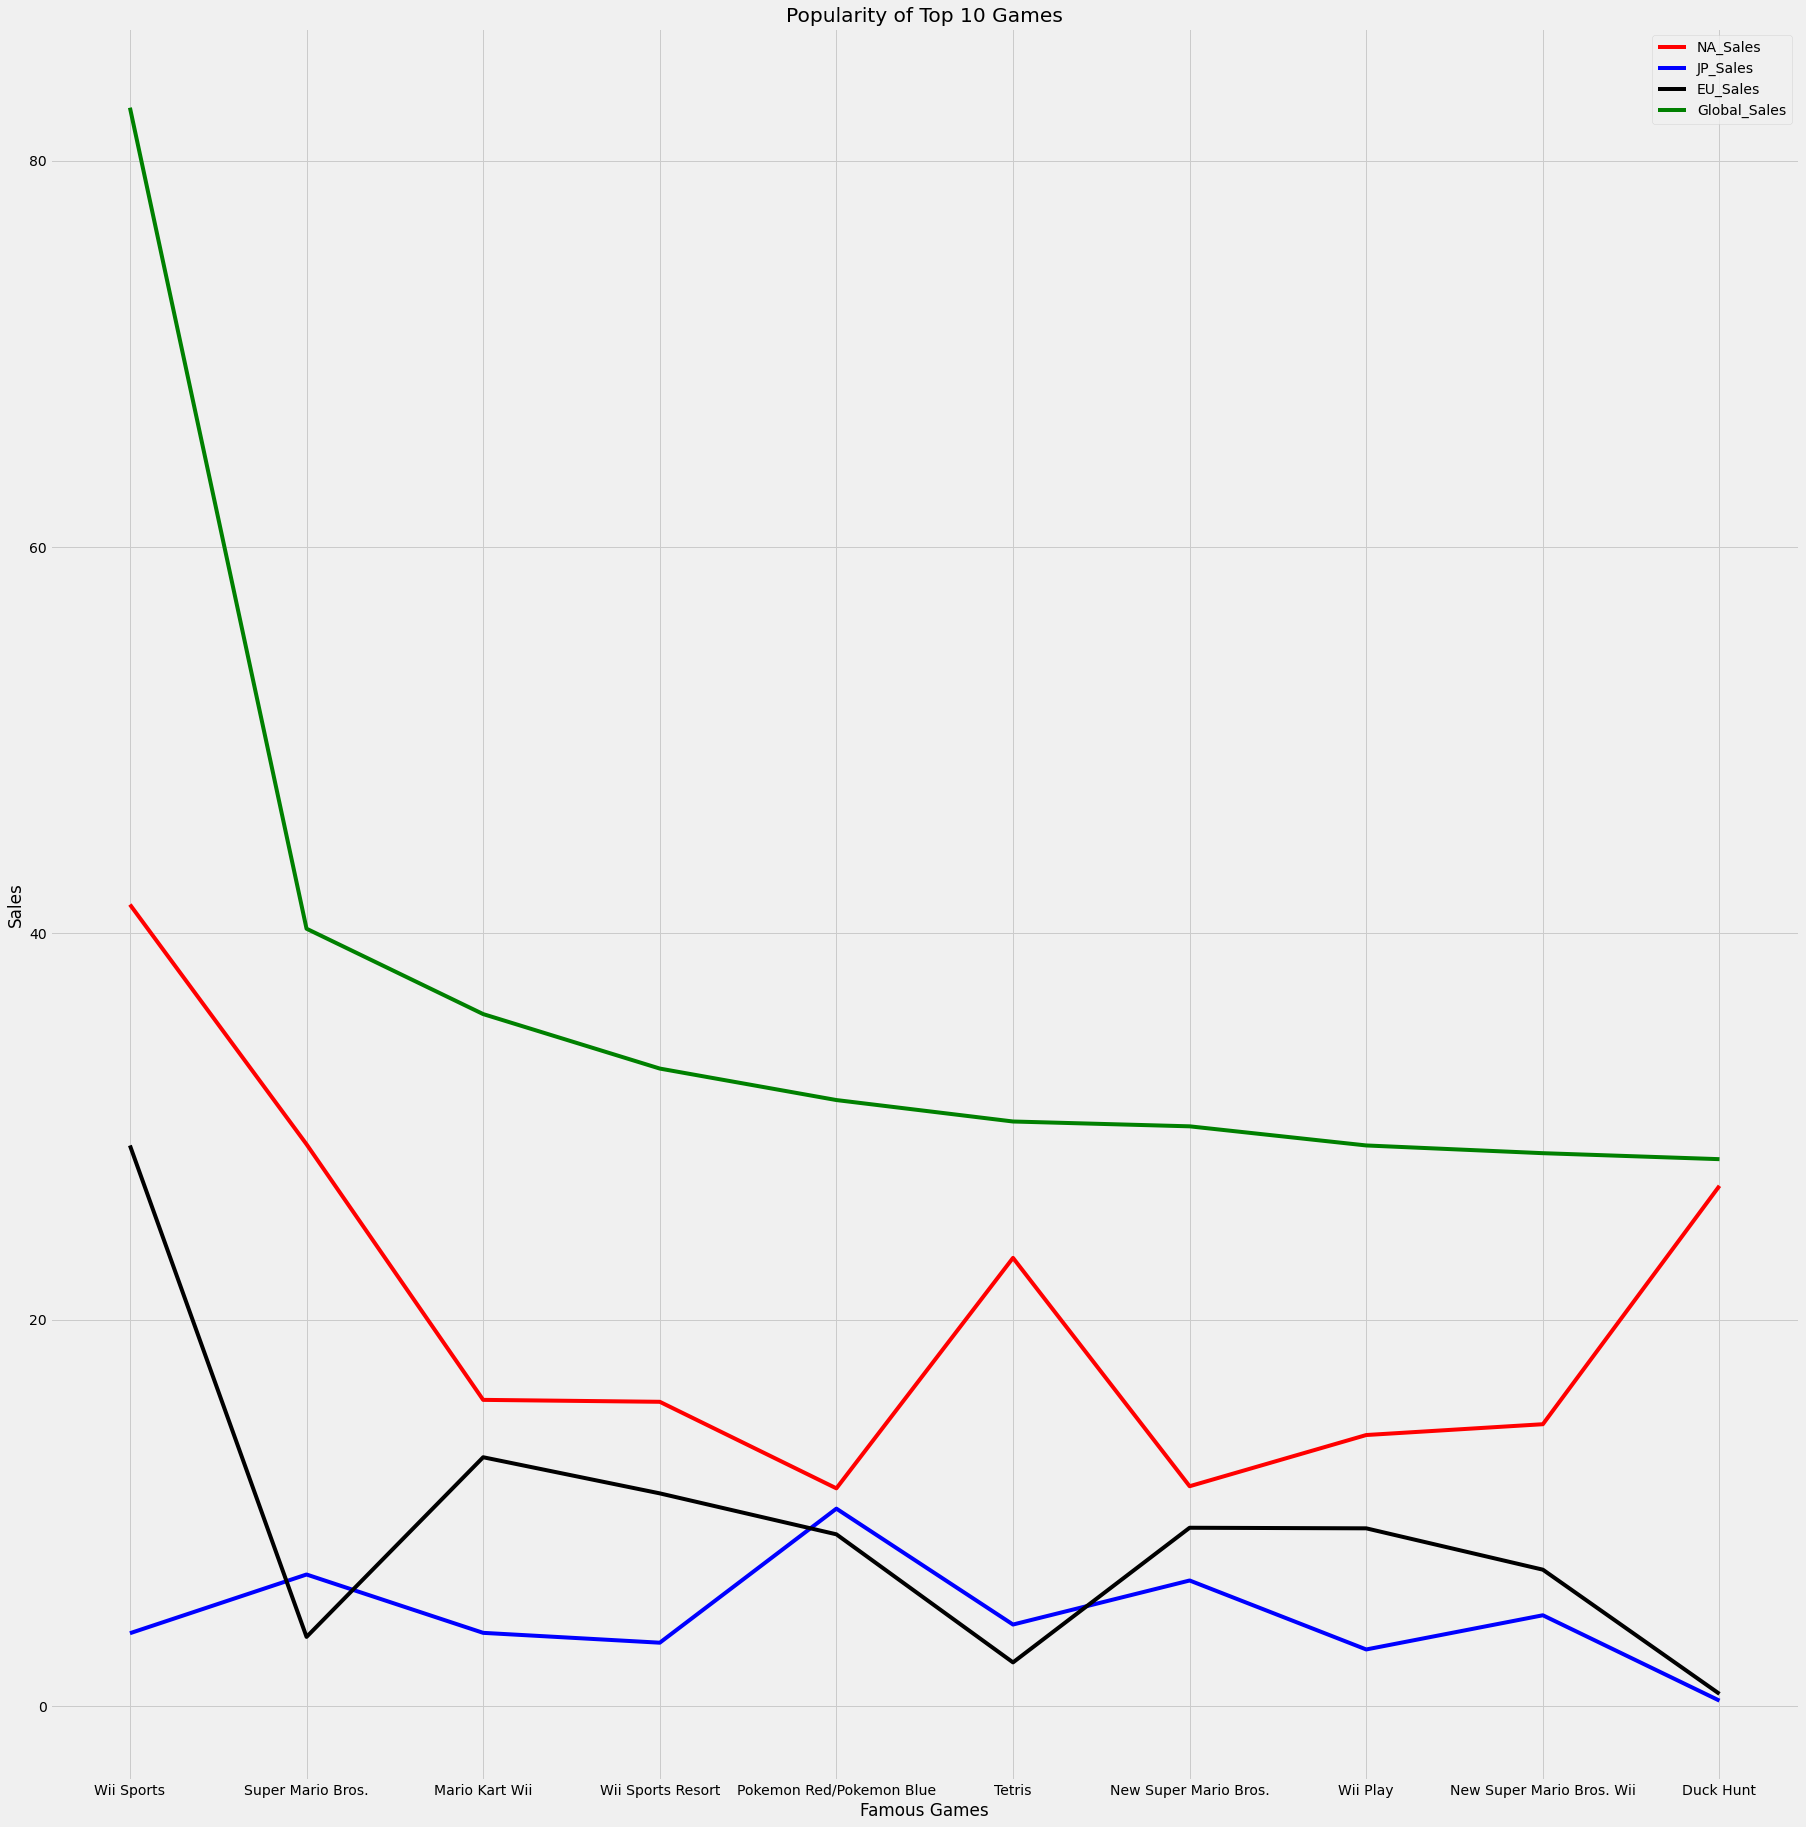

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,25))
plt.plot(vgSales['name'].head(10), vgSales['na_sales'].head(10), color='red', label='NA_Sales')
plt.plot(vgSales['name'].head(10), vgSales['jp_sales'].head(10), color ='blue', label='JP_Sales')
plt.plot(vgSales['name'].head(10), vgSales['eu_sales'].head(10), color='black', label='EU_Sales')
plt.plot(vgSales['name'].head(10), vgSales['global_sales'].head(10), color='green', label='Global_Sales')
plt.tight_layout()
plt.legend()
plt.xlabel('Famous Games')
plt.ylabel('Sales')
plt.title('Popularity of Top 10 Games')

### B. Sales per Platform

### E. Sales per year

In [16]:
pc = (vgSales['platform']=='PC')

***I can see individual sales on platforms by region and overall***

In [17]:
print(vgSales['jp_sales'][pc].sum())
print(vgSales['eu_sales'][pc].sum())
print(vgSales['na_sales'][pc].sum())
print(vgSales['global_sales'][pc].sum())

0.16999999999999998
139.67999999999998
93.27999999999999
258.82


### C. Sales per Genre

***Note to self: I need to figure out how to make the graph bigger***

Text(0, 0.5, 'Global Sales')

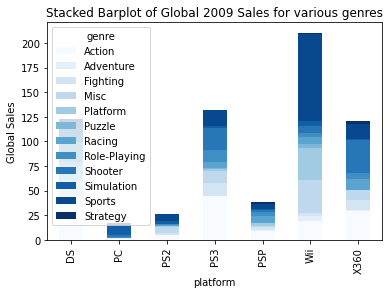

In [13]:
release2009 = vgSales[vgSales['year'] == 2009]
yearlySales = release2009.groupby(['platform','genre']).global_sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)
plt.title('Stacked Barplot of Global 2009 Sales for various genres')
plt.ylabel('Global Sales')

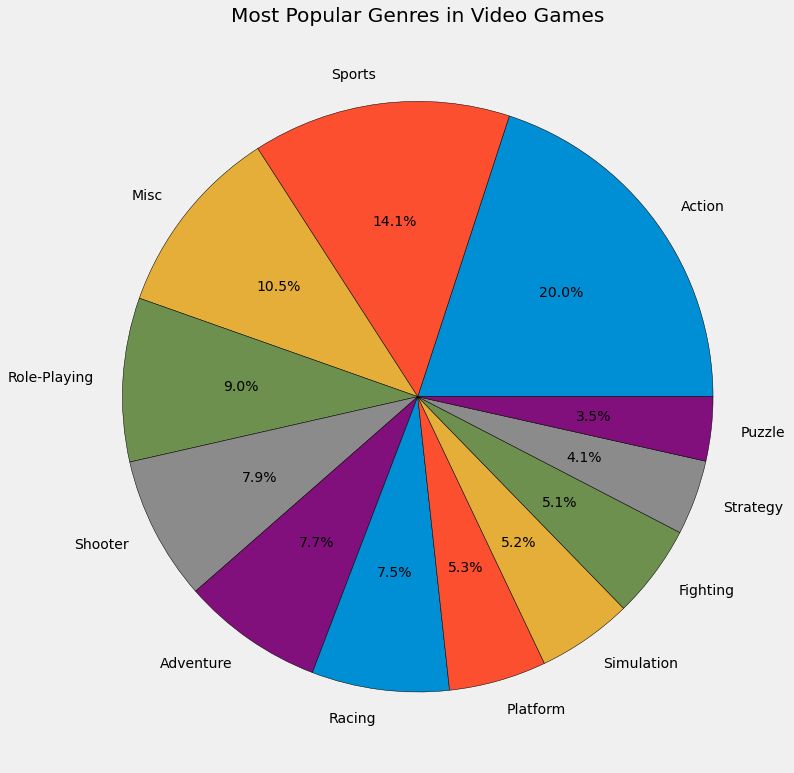

In [14]:
labels = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']


plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(11,11))
plt.pie(list(vgSales['genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Most Popular Genres in Video Games')
plt.tight_layout()
plt.show()

### D. Sales per Publisher